### Modelos basados en Arboles

Supondremos que tenemos datos de diferentes parámetros ambientales y que nuestro objetivo es clasificar la calidad del aire en varias categorías (por ejemplo, 'Buena', 'Moderada', 'Mala')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


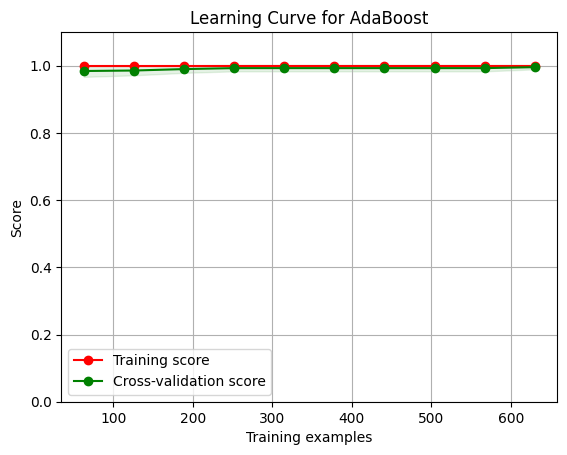

              precision    recall  f1-score   support

       Buena       1.00      0.92      0.96        37
    Moderada       0.99      1.00      0.99       263

    accuracy                           0.99       300
   macro avg       0.99      0.96      0.98       300
weighted avg       0.99      0.99      0.99       300

Accuracy: 0.99


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Generación de Datos Simulados
np.random.seed(42)
n_samples = 1000
data = {
    'PM2.5': np.random.normal(50, 15, n_samples),
    'PM10': np.random.normal(30, 10, n_samples),
    'O3': np.random.normal(40, 12, n_samples),
    'NO2': np.random.normal(20, 7, n_samples),
    'SO2': np.random.normal(10, 3, n_samples),
    'CO': np.random.normal(0.5, 0.2, n_samples),
    'Temperature': np.random.normal(20, 5, n_samples),
    'Humidity': np.random.normal(60, 10, n_samples),
    'WindSpeed': np.random.normal(5, 1.5, n_samples),
}

df = pd.DataFrame(data)
conditions = [
    (df['PM2.5'] <= 50) & (df['PM10'] <= 30) & (df['O3'] <= 40),
    (df['PM2.5'] > 50) & (df['PM2.5'] <= 100) & (df['PM10'] > 30) & (df['PM10'] <= 60) & (df['O3'] > 40) & (df['O3'] <= 80),
    (df['PM2.5'] > 100) & (df['PM10'] > 60) & (df['O3'] > 80)
]
choices = ['Buena', 'Moderada', 'Mala']
df['Quality'] = np.select(conditions, choices, default='Moderada')

# 2. Preprocesamiento de Datos
X = df.drop('Quality', axis=1)
y = df['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Entrenamiento de Modelos con AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluación del Modelo
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            X,
                                                            y,
                                                            cv=10,
                                                            n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(model, X_train, y_train, title="Learning Curve for AdaBoost")
plt.show()

# 5. Predicción y Visualización
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


In [11]:
np.random.seed(42)
n_samples = 5000
data = {
    'PM2.5': np.random.normal(75, 25, n_samples),  # Aumentar el valor medio
    'PM10': np.random.normal(50, 20, n_samples),   # Aumentar el valor medio
    'O3': np.random.normal(60, 20, n_samples),     # Aumentar el valor medio
    'NO2': np.random.normal(30, 10, n_samples),    # Aumentar el valor medio
    'SO2': np.random.normal(15, 5, n_samples),     # Aumentar el valor medio
    'CO': np.random.normal(1, 0.5, n_samples),     # Aumentar el valor medio
    'Temperature': np.random.normal(20, 5, n_samples),
    'Humidity': np.random.normal(60, 10, n_samples),
    'WindSpeed': np.random.normal(5, 1.5, n_samples),
}
df = pd.DataFrame(data)
conditions = [
    (df['PM2.5'] <= 50) & (df['PM10'] <= 30) & (df['O3'] <= 40),
    (df['PM2.5'] > 50) & (df['PM2.5'] <= 100) & (df['PM10'] > 30) & (df['PM10'] <= 60) & (df['O3'] > 40) & (df['O3'] <= 80),
    (df['PM2.5'] > 100) & (df['PM10'] > 60) & (df['O3'] > 80)
]
choices = ['Buena', 'Moderada', 'Mala']
df['Quality'] = np.select(conditions, choices, default='Moderada')
df.head()


,PM2.5,PM10,O3,NO2,SO2,CO,Temperature,Humidity,WindSpeed,Quality
0,87.417854,41.524806,46.430105,28.565768,16.741431,1.085437,10.097140,69.140978,4.292214,Moderada
1,71.543392,40.931718,53.890011,29.673441,16.416618,1.006128,14.725072,76.244872,6.519054,Moderada
2,91.192213,14.087137,48.052379,30.642949,10.317401,0.784422,17.064858,63.455173,4.702720,Moderada
3,113.075746,43.398196,62.208361,39.468615,17.897921,0.998737,20.748345,57.448790,5.135854,Moderada
4,69.146166,64.656582,83.943571,22.527827,7.549587,1.245421,25.120812,49.332752,6.076086,Moderada


In [12]:
df['Quality'].value_counts()

,count
Quality,
Moderada,4940
Mala,40
Buena,20


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.25,
                                                    random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# 3. Definición de Modelos
models = {
    'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# 4. Entrenamiento y Evaluación de Modelos
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"{model_name} - Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost - Accuracy: 0.8572199730094467
              precision    recall  f1-score   support

       Buena       0.98      0.59      0.73      1250
        Mala       1.00      1.00      1.00      1200
    Moderada       0.71      0.99      0.82      1255

    accuracy                           0.86      3705
   macro avg       0.90      0.86      0.85      3705
weighted avg       0.90      0.86      0.85      3705

RandomForest - Accuracy: 1.0
              precision    recall  f1-score   support

       Buena       1.00      1.00      1.00      1250
        Mala       1.00      1.00      1.00      1200
    Moderada       1.00      1.00      1.00      1255

    accuracy                           1.00      3705
   macro avg       1.00      1.00      1.00      3705
weighted avg       1.00      1.00      1.00      3705

GradientBoosting - Accuracy: 1.0
              precision    recall  f1-score   support

       Buena       1.00      1.00      1.00      1250
        Mala       1.00    

Best Model: RandomForest - Accuracy: 1.0


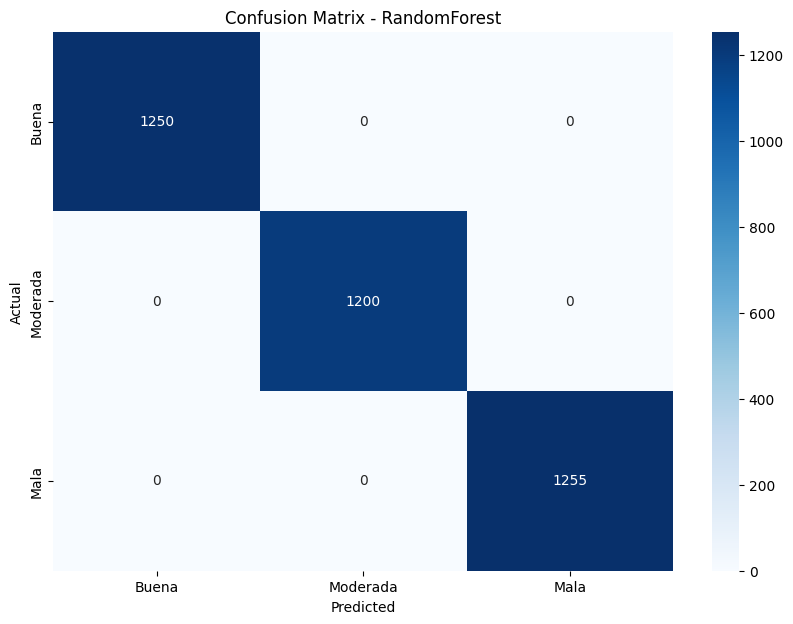

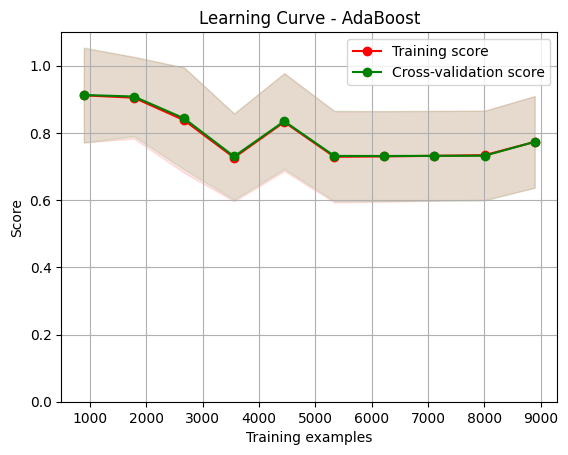

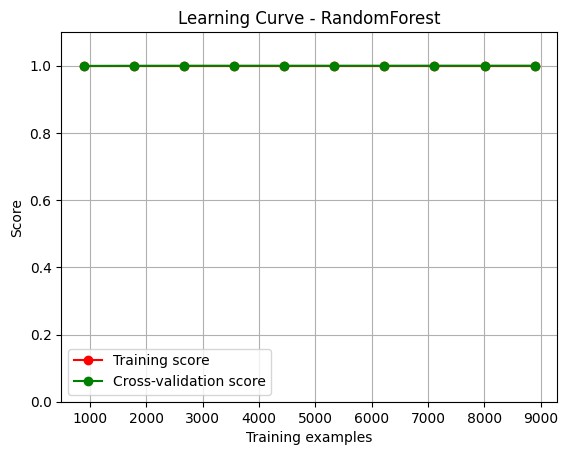

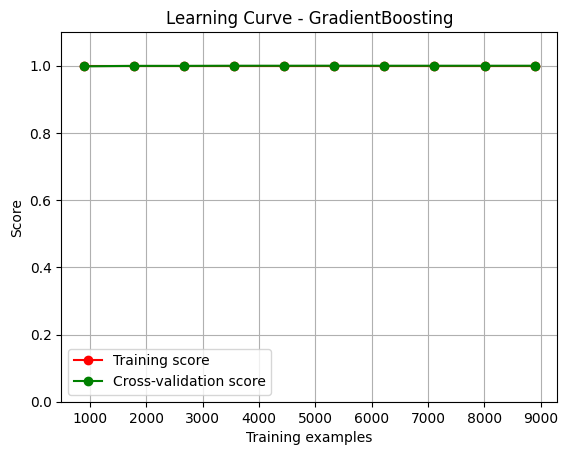

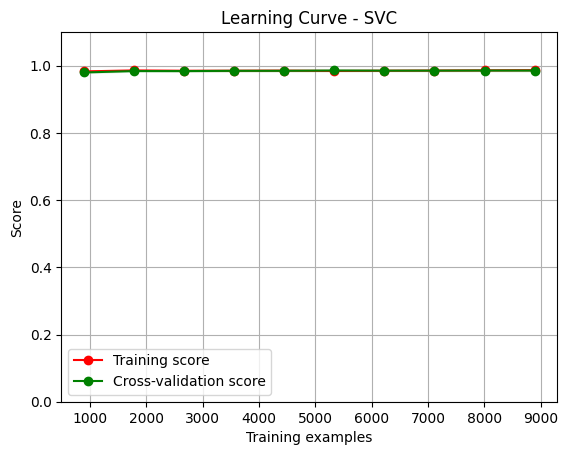

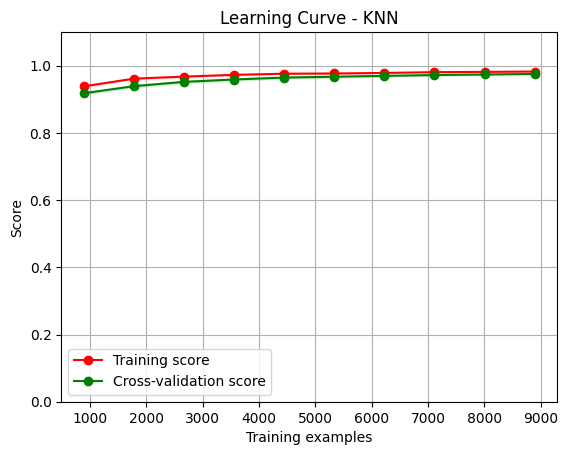

In [17]:

# 5. Selección del Mejor Modelo
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"Best Model: {best_model_name} - Accuracy: {results[best_model_name]['accuracy']}")

# 6. Matriz de Confusión del Mejor Modelo
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=choices, yticklabels=choices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# 7. Curvas de Aprendizaje para Todos los Modelos
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for model_name, model_info in results.items():
    plot_learning_curve(model_info['model'], X_train, y_train, title=f"Learning Curve - {model_name}")
    plt.show()

## Entendiendo los modelos caret

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3,
                                  random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=3, random_state=42)

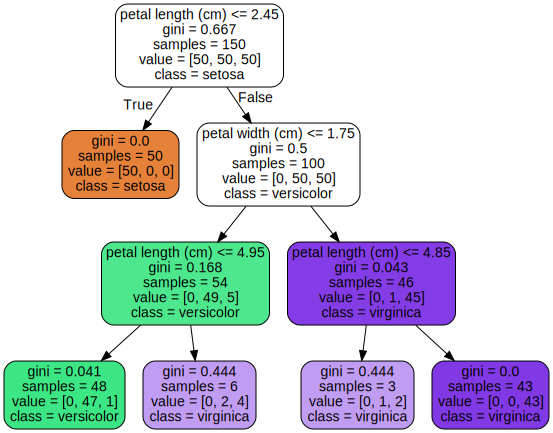

In [25]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(
    tree_clf,
    out_file=None,  # No guardar en un archivo
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)


graph = graphviz.Source(dot_data)
graph.render("iris_tree")
graph

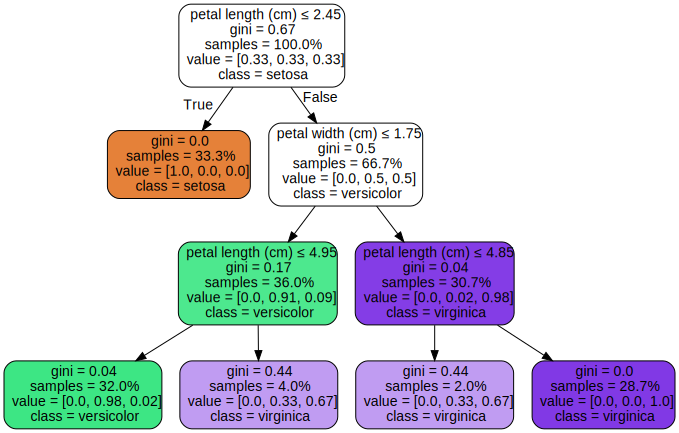

In [26]:
dot_data = export_graphviz(
    tree_clf,
    out_file=None,  # No guardar en un archivo
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
    special_characters=True,  # Permite caracteres especiales
    proportion=True,  # Proporciones de los nodos basados en el número de muestras
    precision=2,  # Precisión de los valores numéricos
    impurity=True,  # Muestra la impureza en los nodos
)


graph = graphviz.Source(dot_data)
graph

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## Seleccionando un mejor modelo
base_clf = DecisionTreeClassifier(random_state=42)
ada_clf = AdaBoostClassifier(base_estimator=base_clf, random_state=42)

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'base_estimator__max_depth': [1, 2, 3, 4],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

# Configurar GridSearchCV con validación cruzada de 10 pliegues
grid_search = GridSearchCV(ada_clf,
                           param_grid,
                           cv=10,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Mejores parámetros: {best_params}")
print(f"Mejor modelo: {best_model}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejores parámetros: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 50}
Mejor modelo: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   learning_rate=0.1, random_state=42)


In [28]:
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy del mejor modelo en el conjunto de prueba: {accuracy_best}")
print(classification_report(y_test, y_pred_best))

# Evaluar el clasificador base en el conjunto de prueba
base_clf.fit(X_train, y_train)
y_pred_base = base_clf.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Accuracy del clasificador base en el conjunto de prueba: {accuracy_base}")
print(classification_report(y_test, y_pred_base))

Accuracy del mejor modelo en el conjunto de prueba: 1.0
              precision    recall  f1-score   support

       Buena       1.00      1.00      1.00      1250
        Mala       1.00      1.00      1.00      1200
    Moderada       1.00      1.00      1.00      1255

    accuracy                           1.00      3705
   macro avg       1.00      1.00      1.00      3705
weighted avg       1.00      1.00      1.00      3705

Accuracy del clasificador base en el conjunto de prueba: 1.0
              precision    recall  f1-score   support

       Buena       1.00      1.00      1.00      1250
        Mala       1.00      1.00      1.00      1200
    Moderada       1.00      1.00      1.00      1255

    accuracy                           1.00      3705
   macro avg       1.00      1.00      1.00      3705
weighted avg       1.00      1.00      1.00      3705



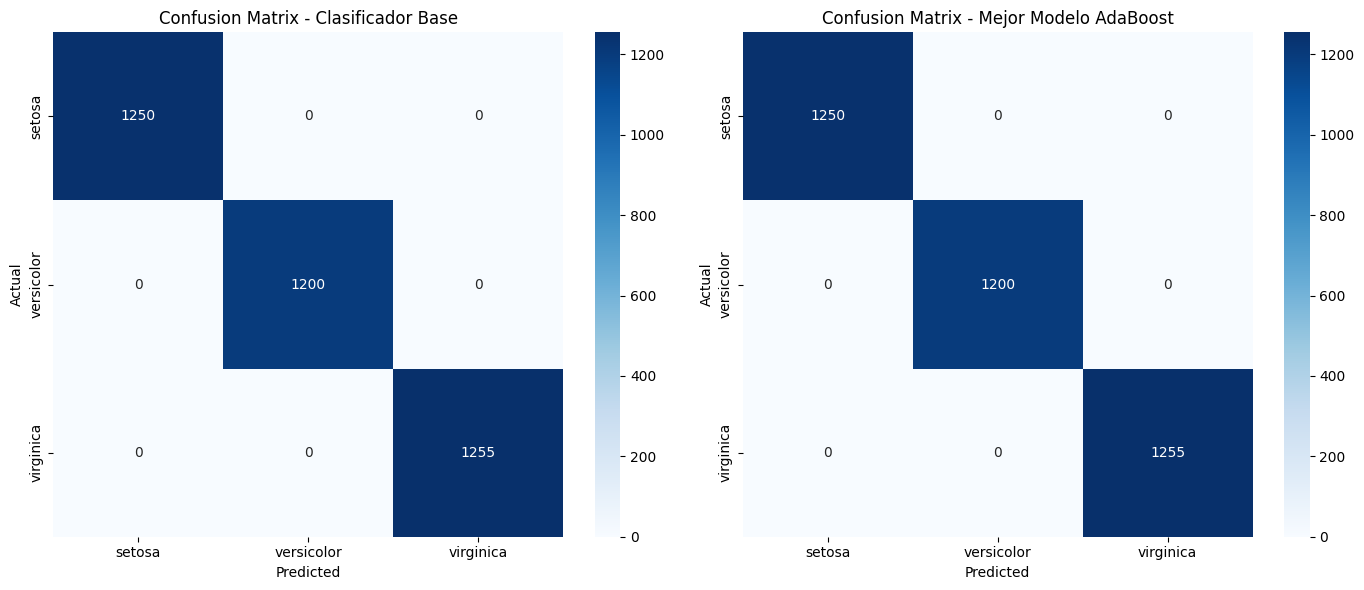

In [29]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
conf_matrix_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(conf_matrix_base, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Clasificador Base')

plt.subplot(1, 2, 2)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Mejor Modelo AdaBoost')

plt.tight_layout()
plt.show()


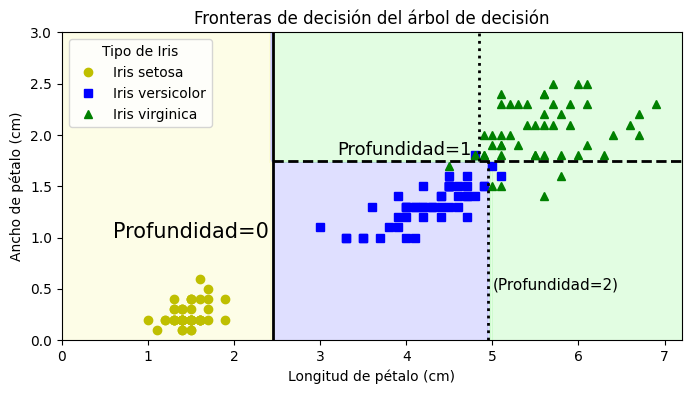

In [32]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))



# Crear una malla para el contorno
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)

# Dibujar los contornos de predicción
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

# Graficar las muestras de entrenamiento con diferentes estilos y etiquetas
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# Entrenar un árbol de decisión más profundo para visualizar umbrales adicionales
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

# Añadir etiquetas y líneas para los umbrales de profundidad
plt.xlabel("Longitud de pétalo (cm)")
plt.ylabel("Ancho de pétalo (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Profundidad=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Profundidad=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Profundidad=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])

# Añadir una leyenda y mostrar el gráfico
plt.legend(title="Tipo de Iris")
plt.title("Fronteras de decisión del árbol de decisión")
plt.show()

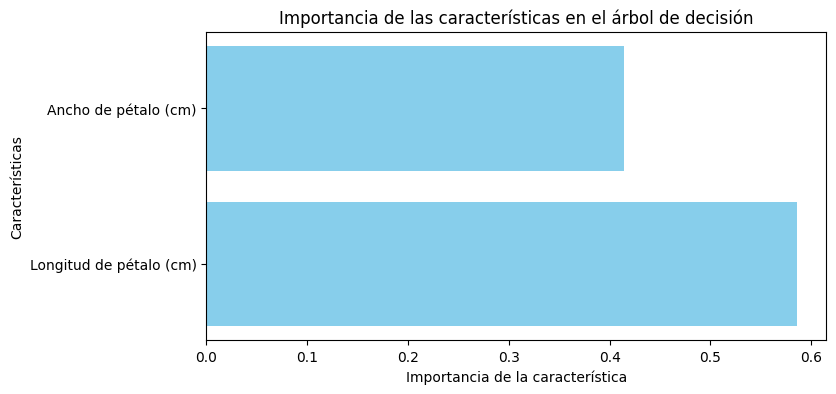

In [33]:
importances = tree_clf.feature_importances_
features = ["Longitud de pétalo (cm)", "Ancho de pétalo (cm)"]

# Graficar la importancia de las características
plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en el árbol de decisión")
plt.show()

## Explicado desde las probabilidades

In [36]:
tree_clf.predict_proba([[5, 1.5]]).round(2)

array([[0.  , 0.33, 0.67]])

In [35]:
tree_clf.predict([[5, 1.5]])

array([2])

### Regularizando parámetros

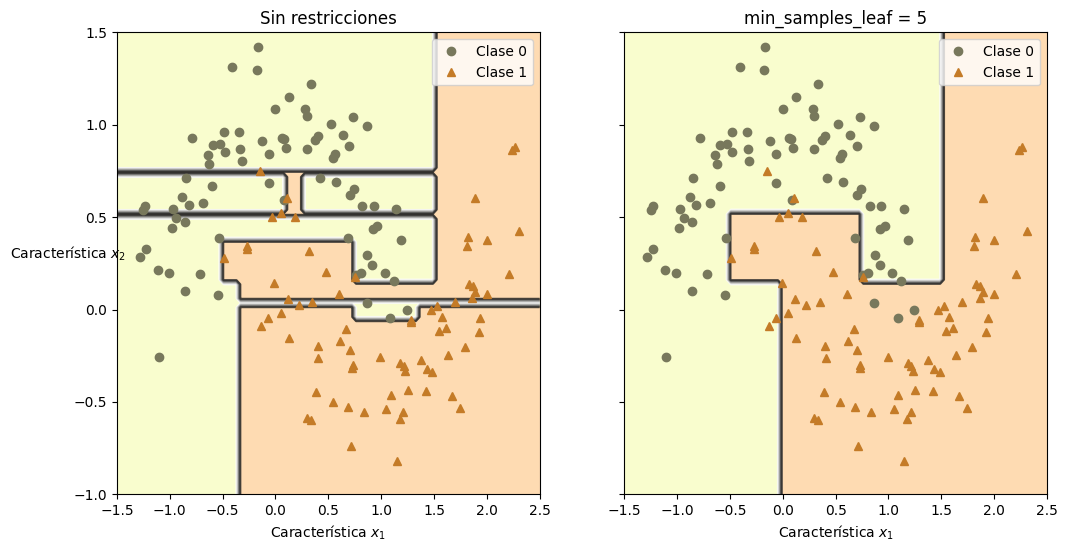

In [37]:
from sklearn.datasets import make_moons
# Generar datos sintéticos con make_moons
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

# Entrenar dos modelos de árbol de decisión: uno sin restricciones y otro con min_samples_leaf=5
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

# Función para graficar la frontera de decisión de un clasificador
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none", label=f"Clase {idx}")
    plt.axis(axes)
    plt.xlabel("Característica $x_1$")
    plt.ylabel("Característica $x_2$", rotation=0)
    plt.legend()

# Crear una figura con dos subgráficos para comparar los modelos
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.5, -1, 1.5], cmap="Wistia")
plt.title("Sin restricciones")

plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.5, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()


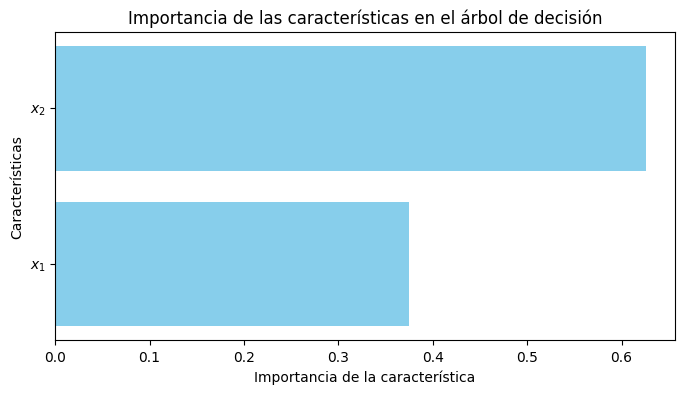

'Source.gv.pdf'

In [38]:

# Visualizar la importancia de las características
importances = tree_clf2.feature_importances_
features = ["$x_1$", "$x_2$"]

plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en el árbol de decisión")
plt.show()

# Visualización del árbol de decisión para el segundo clasificador
dot_data = export_graphviz(
    tree_clf2,
    out_file=None,
    feature_names=["$x_1$", "$x_2$"],
    class_names=["Clase 0", "Clase 1"],
    rounded=True,
    filled=True,
    special_characters=True,
    proportion=True,
    precision=2,
    impurity=True
)

graph = graphviz.Source(dot_data)
graph.view()

In [41]:
X_moons_test, y_moons_test = make_moons(n_samples=1000,
                                        noise=0.1,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.925

In [42]:
tree_clf2.score(X_moons_test, y_moons_test)


0.973

### Regresión

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# Generar datos sintéticos
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # Una característica de entrada aleatoria
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)  # Variable de salida cuadrática con ruido

# Entrenar dos modelos de regresión con árboles de decisión
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

# Función para graficar la predicción del modelo y la verdadera relación
def plot_regression_predictions(tree, X, y, axes, label=None, linestyle="solid", color="r"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree.predict(x1)
    plt.plot(X, y, "b.", label="Datos")
    plt.plot(x1, y_pred, color=color, linestyle=linestyle, linewidth=2, label=label)
    plt.xlabel("Característica $x_1$")
    plt.ylabel("Variable de salida $y$")
    plt.axis(axes)
    plt.legend(loc="upper center")



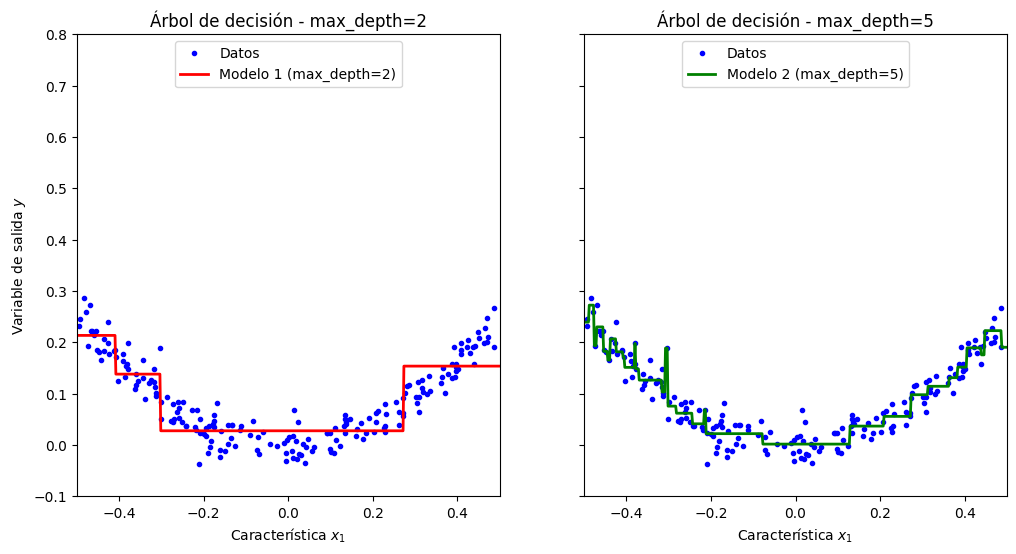

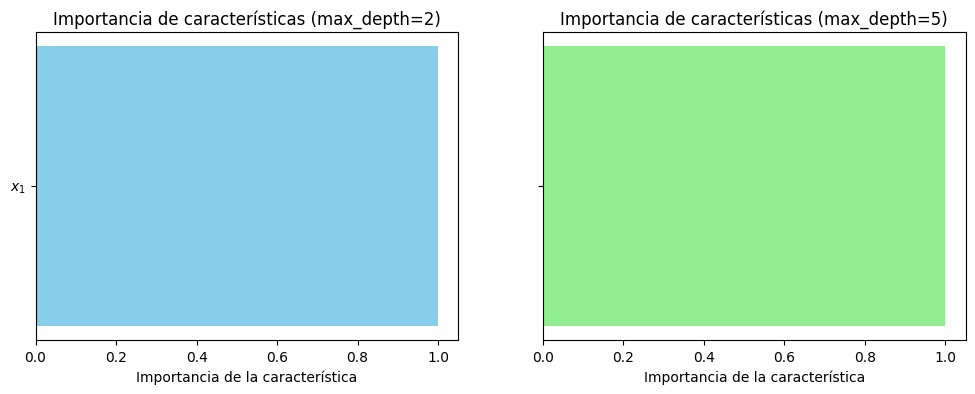

'Source.gv.pdf'

In [44]:
# Crear una figura con dos subgráficos para comparar los modelos
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X_quad, y_quad,
                            axes=[-0.5, 0.5, -0.1, 0.8], label="Modelo 1 (max_depth=2)", color="r")
plt.title("Árbol de decisión - max_depth=2")

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X_quad, y_quad,
                            axes=[-0.5, 0.5, -0.1, 0.8], label="Modelo 2 (max_depth=5)", color="g")
plt.title("Árbol de decisión - max_depth=5")
plt.ylabel("")

plt.show()

# Importancia de las características
importances1 = tree_reg1.feature_importances_
importances2 = tree_reg2.feature_importances_
features = ["$x_1$"]

# Graficar la importancia de las características para ambos modelos
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

ax[0].barh(features, importances1, color='skyblue')
ax[0].set_xlabel("Importancia de la característica")
ax[0].set_title("Importancia de características (max_depth=2)")

ax[1].barh(features, importances2, color='lightgreen')
ax[1].set_xlabel("Importancia de la característica")
ax[1].set_title("Importancia de características (max_depth=5)")

plt.show()

# Exportar y visualizar el árbol de decisión para el primer modelo
dot_data1 = export_graphviz(
    tree_reg1,
    out_file=None,
    feature_names=["$x_1$"],
    rounded=True,
    filled=True,
    special_characters=True,
    precision=2
)

graph1 = graphviz.Source(dot_data1)
graph1.view()

# Exportar y visualizar el árbol de decisión para el segundo modelo
dot_data2 = export_graphviz(
    tree_reg2,
    out_file=None,
    feature_names=["$x_1$"],
    rounded=True,
    filled=True,
    special_characters=True,
    precision=2
)

graph2 = graphviz.Source(dot_data2)
graph2.view()


In [45]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

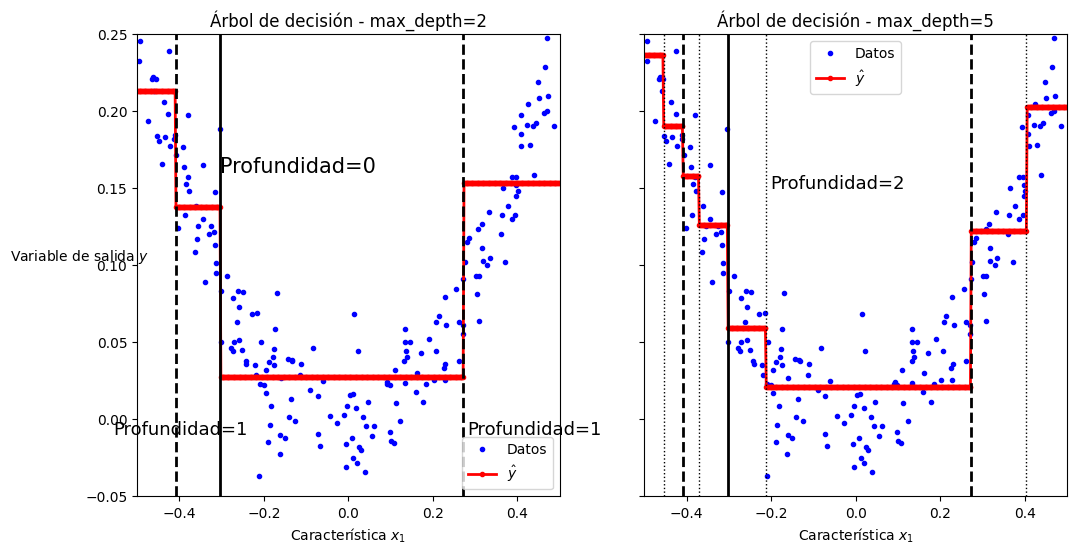

In [48]:
def graficar_predicciones_regresion(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("Característica $x_1$")
    plt.plot(X, y, "b.", label="Datos")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.legend()

# Crear una figura con dos subgráficos para comparar los modelos
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

# Graficar para el primer modelo (max_depth=2)
plt.sca(axes[0])
graficar_predicciones_regresion(tree_reg1, X_quad, y_quad)

# Umbrales y estilos de división para el primer modelo
th0, th1a, th1b = tree_reg1.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Profundidad=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Profundidad=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Profundidad=1", fontsize=13)
plt.ylabel("Variable de salida $y$", rotation=0)
plt.title("Árbol de decisión - max_depth=2")

# Graficar para el segundo modelo (max_depth=5)
plt.sca(axes[1])
graficar_predicciones_regresion(tree_reg2, X_quad, y_quad)

th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Profundidad=2", fontsize=13)
plt.title("Árbol de decisión - max_depth=5")
plt.ylabel("")

plt.show()



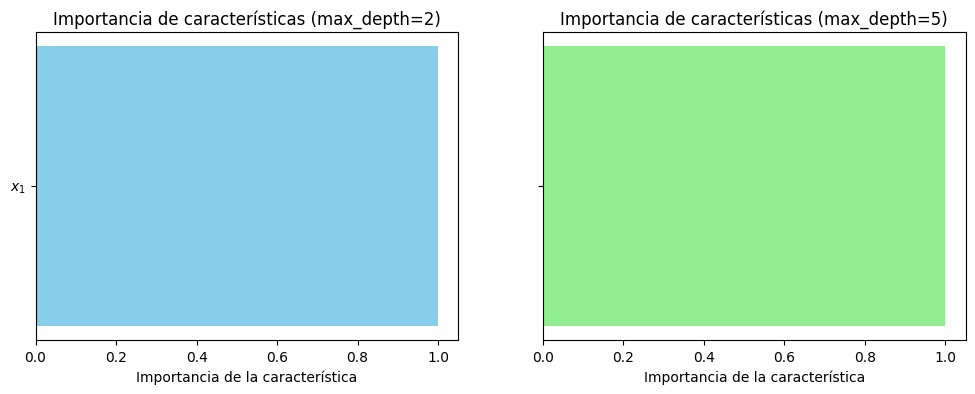

'Source.gv.pdf'

In [49]:
importances1 = tree_reg1.feature_importances_
importances2 = tree_reg2.feature_importances_
features = ["$x_1$"]

# Graficar la importancia de las características para ambos modelos
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

ax[0].barh(features, importances1, color='skyblue')
ax[0].set_xlabel("Importancia de la característica")
ax[0].set_title("Importancia de características (max_depth=2)")

ax[1].barh(features, importances2, color='lightgreen')
ax[1].set_xlabel("Importancia de la característica")
ax[1].set_title("Importancia de características (max_depth=5)")

plt.show()

# Exportar y visualizar el árbol de decisión para el primer modelo
dot_data1 = export_graphviz(
    tree_reg1,
    out_file=None,
    feature_names=["$x_1$"],
    rounded=True,
    filled=True,
    special_characters=True,
    precision=2
)

graph1 = graphviz.Source(dot_data1)
graph1.view()

# Exportar y visualizar el árbol de decisión para el segundo modelo
dot_data2 = export_graphviz(
    tree_reg2,
    out_file=None,
    feature_names=["$x_1$"],
    rounded=True,
    filled=True,
    special_characters=True,
    precision=2
)

graph2 = graphviz.Source(dot_data2)
graph2.view()

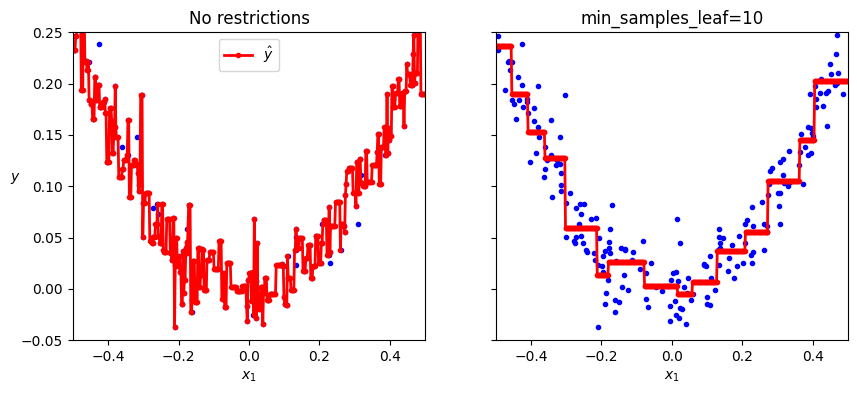

In [51]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")
plt.show()

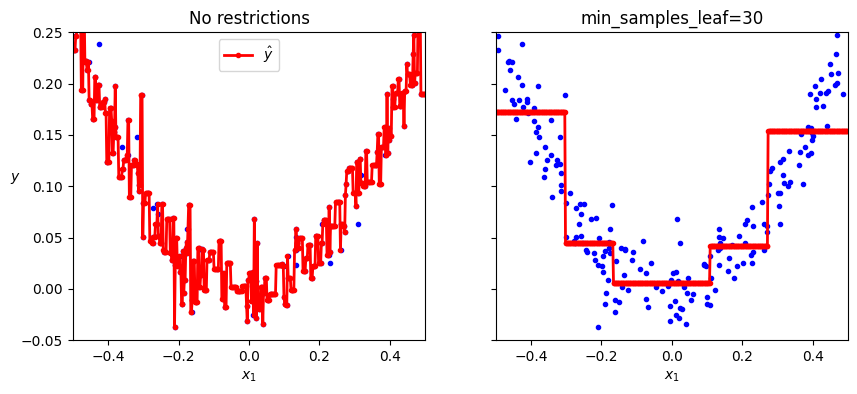

In [52]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=30)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")
plt.show()

### Árboles de decisión con alta varianza

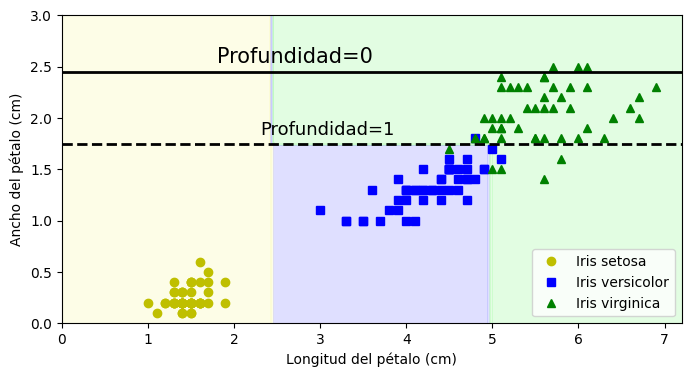

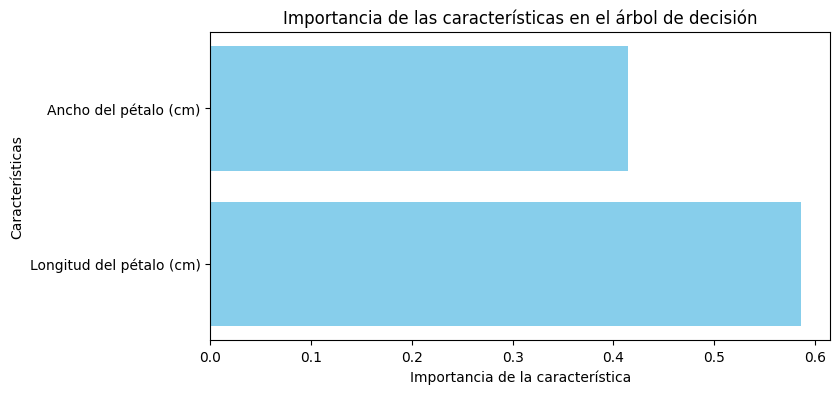

In [58]:
import shap
tree_clf_tweaked = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_tweaked.fit(X_iris, y_iris)
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

# Crear una figura
plt.figure(figsize=(8, 4))

# Crear una malla para el contorno
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)

# Dibujar los contornos de predicción
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

# Graficar las muestras de entrenamiento con diferentes estilos y etiquetas
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# Umbrales del árbol
th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Profundidad=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Profundidad=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Longitud del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()

# Importancia de características del modelo
importancias = tree_clf_tweaked.feature_importances_
caracteristicas = ["Longitud del pétalo (cm)", "Ancho del pétalo (cm)"]

# Graficar la importancia de las características
plt.figure(figsize=(8, 4))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en el árbol de decisión")
plt.show()

### Modelos basados en votos

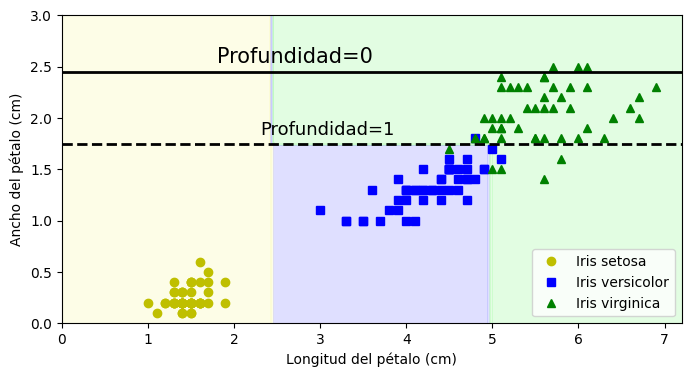

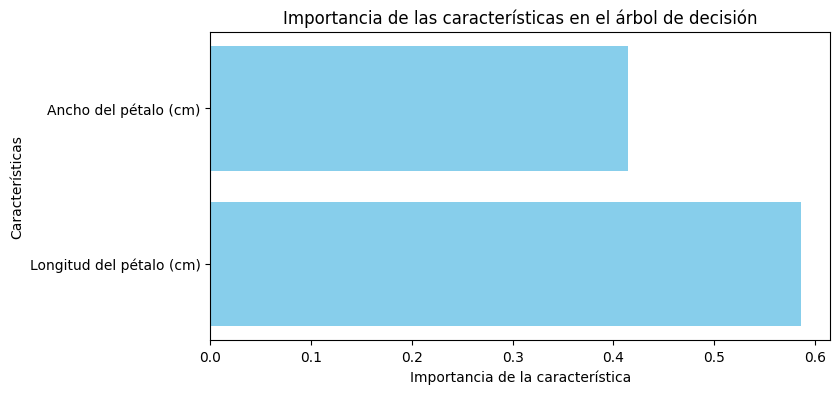

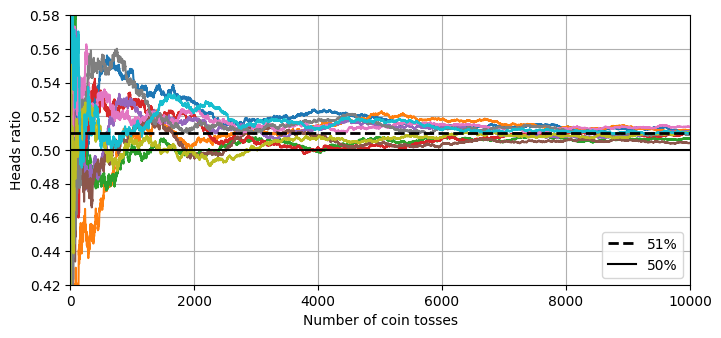

In [60]:
heads_proba = 0.51
np.random.seed(42)
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8, 3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.grid()
plt.show()

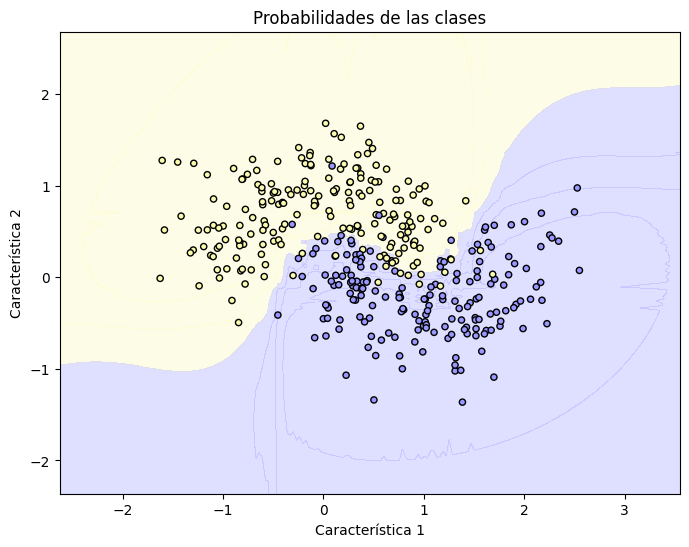

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Generar datos sintéticos
X, y = make_moons(n_samples=1500,
                  noise=0.30,
                  random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Definir el clasificador de votación con tres estimadores
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))  # Establecer probability=True para obtener probabilidades
    ],
    voting='soft'  # Utilizar votación 'soft' para obtener probabilidades
)

# Entrenar el clasificador de votación
voting_clf.fit(X_train, y_train)

# Función para graficar las probabilidades de las clases
def plot_probabilidades_de_clases(modelo, X, y, ax):
    x1, x2 = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_proba = modelo.predict_proba(X_new).reshape(x1.shape[0], x1.shape[1], 2)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff'])

    ax.contourf(x1, x2, y_proba[:, :, 1], alpha=0.3, cmap=custom_cmap)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, s=20, edgecolor='k')
    ax.set_xlabel("Característica 1")
    ax.set_ylabel("Característica 2")
    ax.set_title("Probabilidades de las clases")

# Crear una figura para mostrar las probabilidades de las clases
fig, ax = plt.subplots(figsize=(8, 6))
plot_probabilidades_de_clases(voting_clf, X_test, y_test, ax)
plt.show()


In [64]:
for i, clf in voting_clf.named_estimators_.items():
    print(i, "=", clf.score(X_test, y_test))

lr = 0.8746666666666667
rf = 0.904
svc = 0.9306666666666666


## Bagging and Pasting

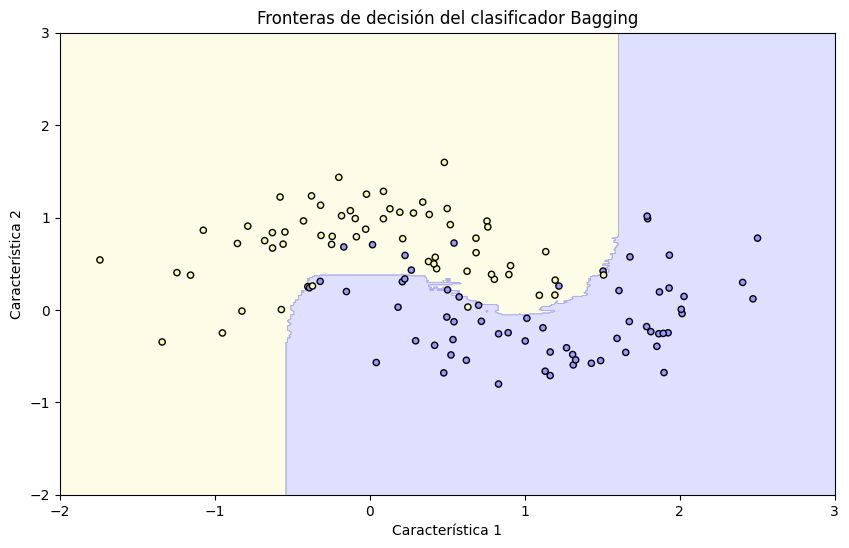

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generar datos sintéticos
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Definir y entrenar el clasificador Bagging
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

# Función para graficar las fronteras de decisión del modelo
def plot_decision_boundary(clf, X, y, axes):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 500),
                         np.linspace(axes[2], axes[3], 500))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff'])

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, s=20, edgecolor='k')
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.axis(axes)
    plt.title("Fronteras de decisión del clasificador Bagging")

# Crear una figura para mostrar las fronteras de decisión del clasificador Bagging
plt.figure(figsize=(10, 6))
plot_decision_boundary(bag_clf, X_test, y_test, axes=[-2, 3, -2, 3])
plt.show()


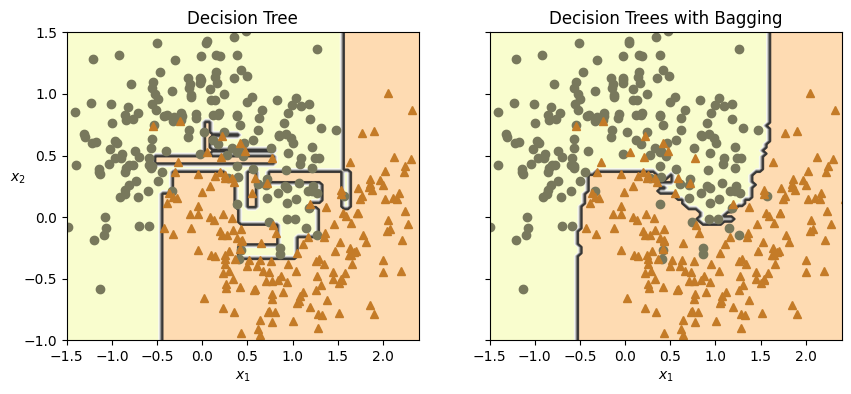

In [66]:
def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
plt.show()

In [70]:
## OOB
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=300,
                            oob_score=True,
                            n_jobs=-1,
                            random_state=42)
bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)
print(bag_clf.oob_decision_function_[:3])

0.896
[[0.33333333 0.66666667]
 [0.31460674 0.68539326]
 [1.         0.        ]]


In [71]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

### Random FOrest

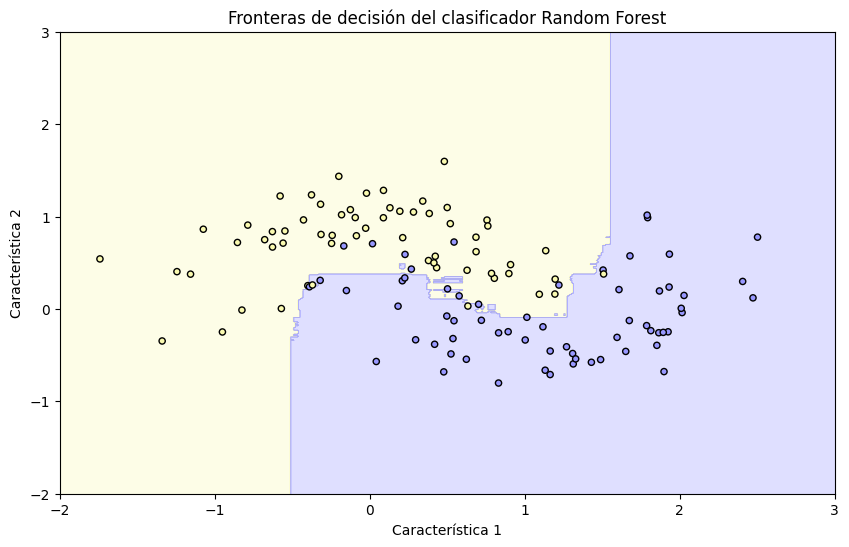

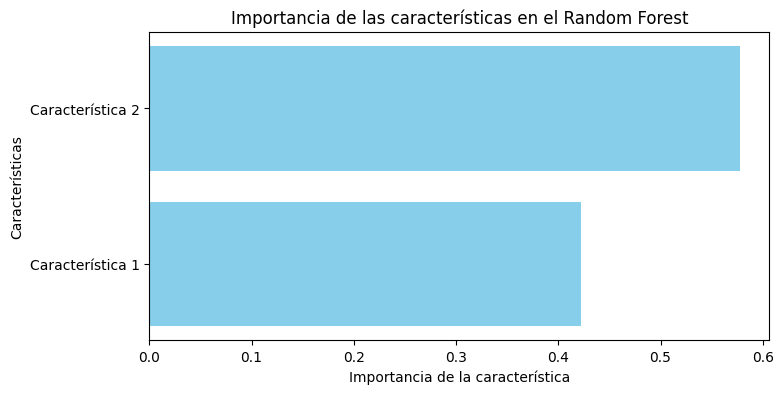

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generar datos sintéticos
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Definir y entrenar el clasificador Random Forest
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

# Definir y entrenar el clasificador Bagging
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

# Verificar que las predicciones son idénticas
assert np.all(y_pred_bag == y_pred_rf), "Las predicciones no son idénticas"

# Función para graficar las fronteras de decisión del modelo
def plot_decision_boundary(clf, X, y, axes):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 500),
                         np.linspace(axes[2], axes[3], 500))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff'])

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, s=20, edgecolor='k')
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.axis(axes)
    plt.title("Fronteras de decisión del clasificador Random Forest")

# Crear una figura para mostrar las fronteras de decisión del clasificador Random Forest
plt.figure(figsize=(10, 6))
plot_decision_boundary(rnd_clf, X_test, y_test, axes=[-2, 3, -2, 3])
plt.show()

# Importancia de características del modelo Random Forest
importancias = rnd_clf.feature_importances_
caracteristicas = ["Característica 1", "Característica 2"]

# Graficar la importancia de las características
plt.figure(figsize=(8, 4))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en el Random Forest")
plt.show()


### AdaBoost

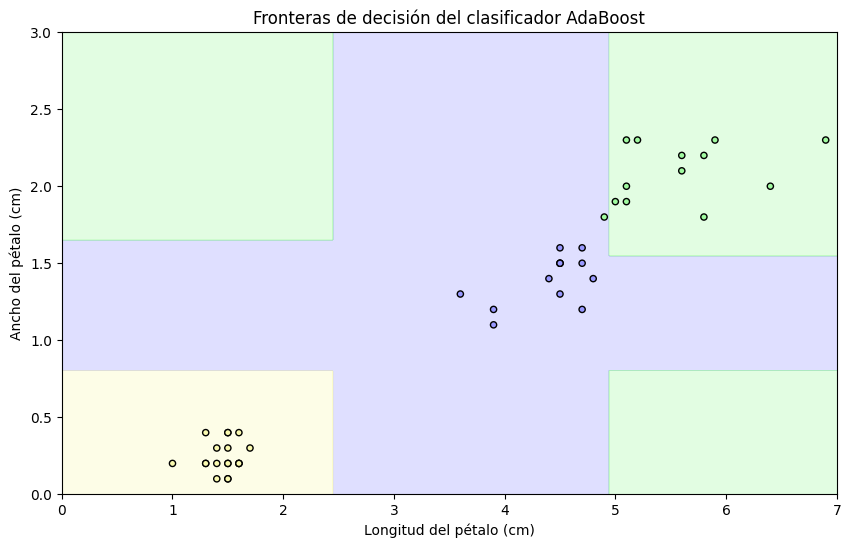

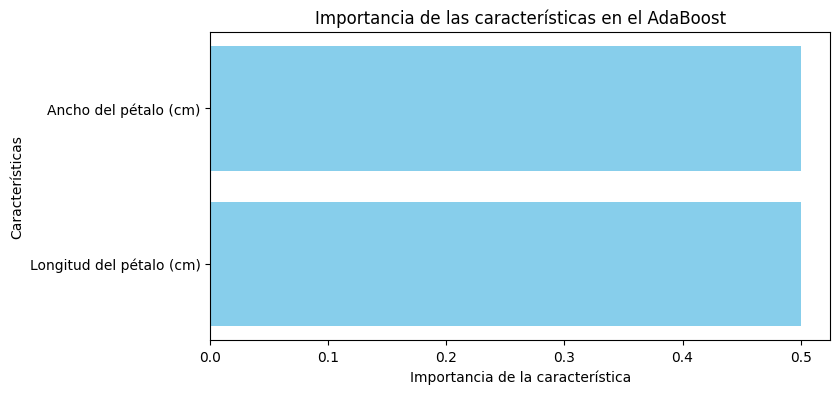

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Cargar los datos de iris
iris = load_iris()
X = iris.data[:, 2:]  # Usar solo las características de longitud y ancho del pétalo
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir y entrenar el clasificador AdaBoost
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5,
    random_state=42
)
ada_clf.fit(X_train, y_train)

# Función para graficar las fronteras de decisión del modelo
def plot_decision_boundary(clf, X, y, axes):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 500),
                         np.linspace(axes[2], axes[3], 500))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, s=20, edgecolor='k')
    plt.xlabel("Longitud del pétalo (cm)")
    plt.ylabel("Ancho del pétalo (cm)")
    plt.axis(axes)
    plt.title("Fronteras de decisión del clasificador AdaBoost")

# Crear una figura para mostrar las fronteras de decisión del clasificador AdaBoost
plt.figure(figsize=(10, 6))
plot_decision_boundary(ada_clf, X_test, y_test, axes=[0, 7, 0, 3])
plt.show()

# Importancia de características del modelo AdaBoost
importancias = ada_clf.feature_importances_
caracteristicas = ["Longitud del pétalo (cm)", "Ancho del pétalo (cm)"]

# Graficar la importancia de las características
plt.figure(figsize=(8, 4))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en el AdaBoost")
plt.show()



### Gradient Boosting

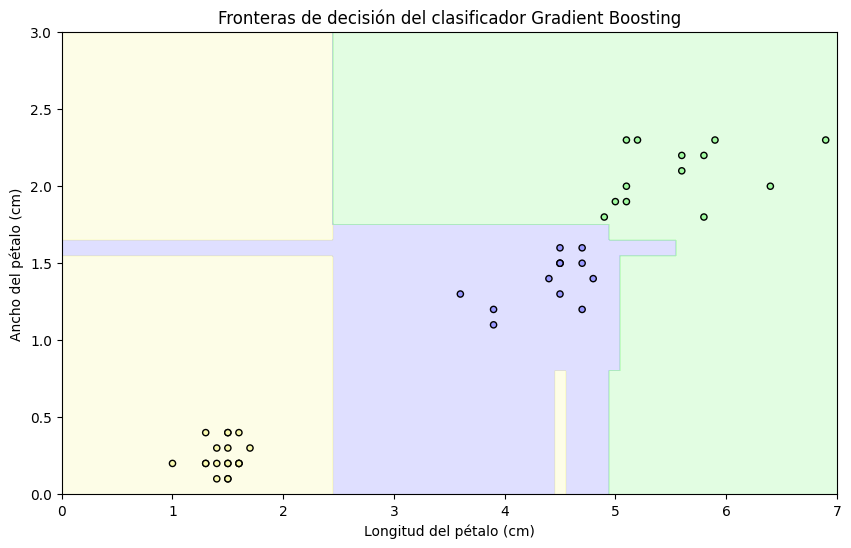

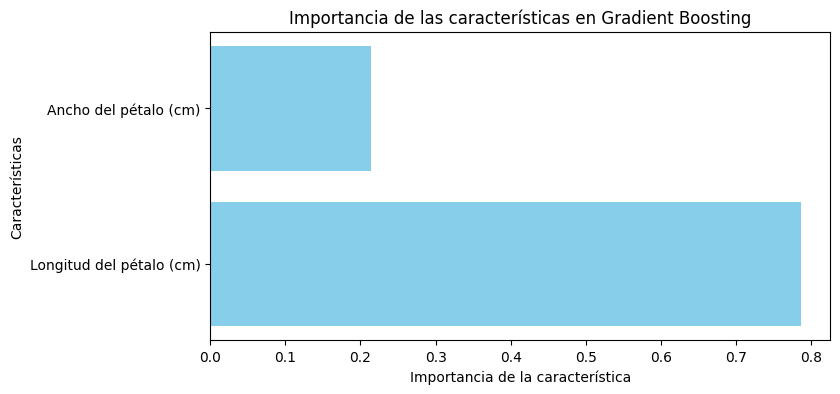

In [80]:
gbrt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbrt_clf.fit(X_train, y_train)

# Función para graficar las fronteras de decisión del modelo
def plot_decision_boundary(clf, X, y, axes):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 500),
                         np.linspace(axes[2], axes[3], 500))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, s=20, edgecolor='k')
    plt.xlabel("Longitud del pétalo (cm)")
    plt.ylabel("Ancho del pétalo (cm)")
    plt.axis(axes)
    plt.title("Fronteras de decisión del clasificador Gradient Boosting")

# Crear una figura para mostrar las fronteras de decisión del clasificador Gradient Boosting
plt.figure(figsize=(10, 6))
plot_decision_boundary(gbrt_clf, X_test, y_test, axes=[0, 7, 0, 3])
plt.show()

# Importancia de características del modelo Gradient Boosting
importancias = gbrt_clf.feature_importances_
caracteristicas = ["Longitud del pétalo (cm)", "Ancho del pétalo (cm)"]

# Graficar la importancia de las características
plt.figure(figsize=(8, 4))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en Gradient Boosting")
plt.show()


Error cuadrático medio: 0.13451455616902183


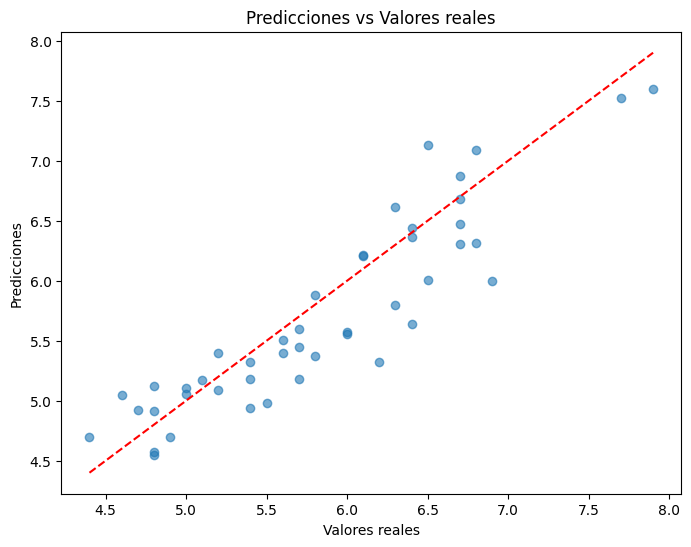

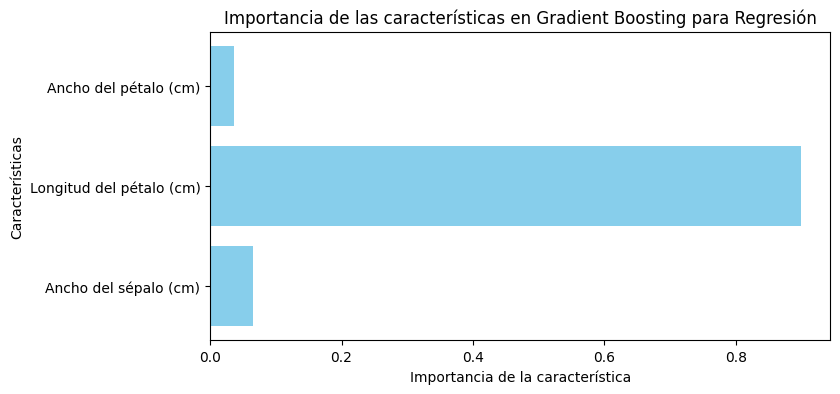

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos de iris
iris = load_iris()
X = iris.data[:, 1:]  # Usar todas las características excepto la longitud del sépalo
y = iris.data[:, 0]  # Usar la longitud del sépalo como la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir y entrenar el modelo Gradient Boosting para regresión
gbrt_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbrt_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred = gbrt_reg.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Función para graficar la relación entre las predicciones y los valores reales
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Predicciones vs Valores reales")
    plt.show()

# Graficar las predicciones frente a los valores reales
plot_predictions(y_test, y_pred)

# Importancia de características del modelo Gradient Boosting
importancias = gbrt_reg.feature_importances_
caracteristicas = ["Ancho del sépalo (cm)", "Longitud del pétalo (cm)", "Ancho del pétalo (cm)"]

# Graficar la importancia de las características
plt.figure(figsize=(8, 4))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en Gradient Boosting para Regresión")
plt.show()


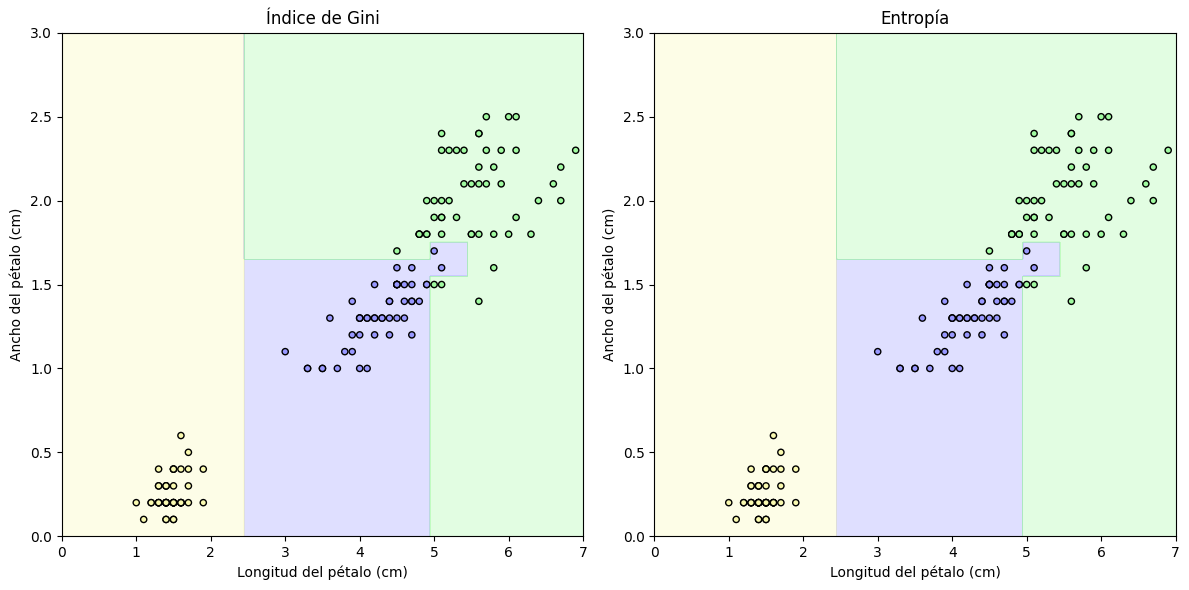

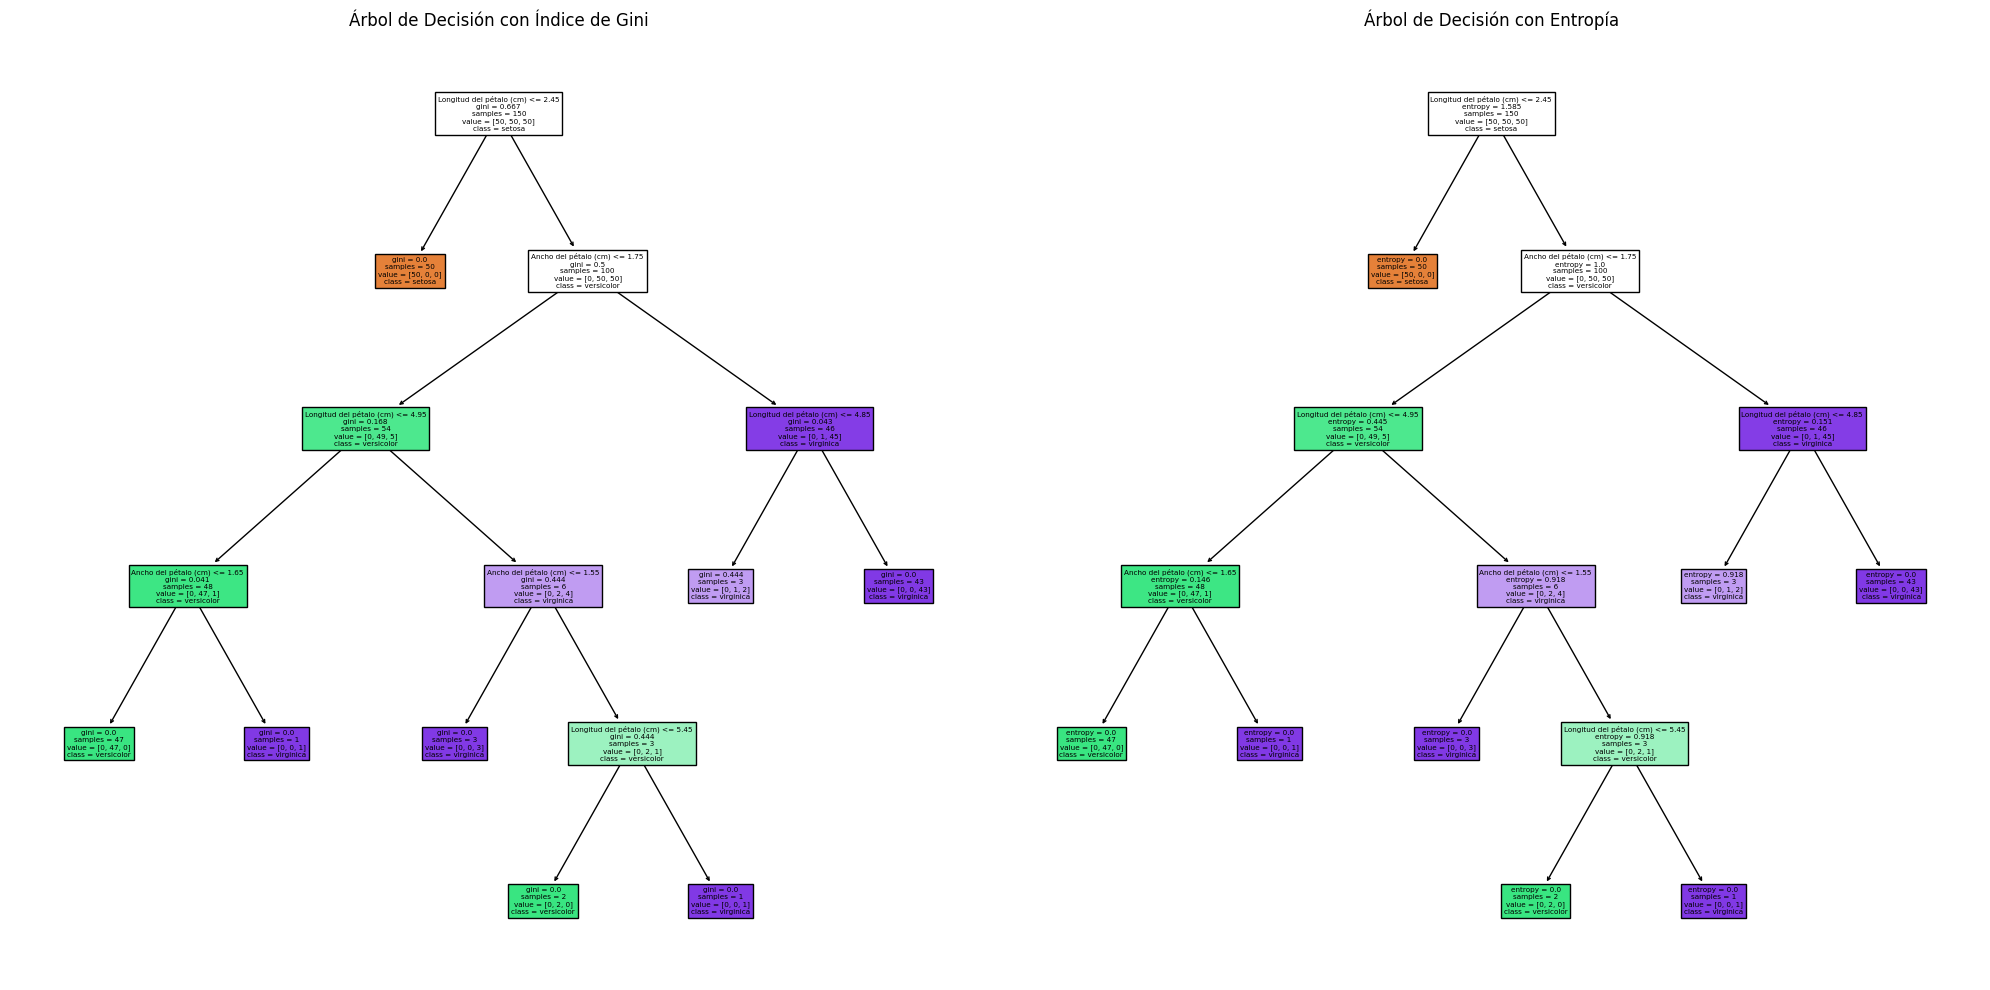

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns

# Cargar los datos de iris
iris = load_iris()
X = iris.data[:, 2:]  # Usar solo las características de longitud y ancho del pétalo
y = iris.target

# Definir los clasificadores de árboles de decisión para Gini y Entropía
gini_tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
entropy_tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Entrenar los clasificadores
gini_tree_clf.fit(X, y)
entropy_tree_clf.fit(X, y)

# Función para graficar las fronteras de decisión
def plot_decision_boundary(clf, X, y, title, axes):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 500),
                         np.linspace(axes[2], axes[3], 500))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, s=20, edgecolor='k')
    plt.xlabel("Longitud del pétalo (cm)")
    plt.ylabel("Ancho del pétalo (cm)")
    plt.axis(axes)
    plt.title(title)

# Crear figura para las fronteras de decisión
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_decision_boundary(gini_tree_clf, X, y, "Índice de Gini", axes=[0, 7, 0, 3])

plt.subplot(122)
plot_decision_boundary(entropy_tree_clf, X, y, "Entropía", axes=[0, 7, 0, 3])

plt.tight_layout()
plt.show()

# Graficar los árboles de decisión
plt.figure(figsize=(20, 10))

plt.subplot(121)
plot_tree(gini_tree_clf, filled=True, feature_names=["Longitud del pétalo (cm)", "Ancho del pétalo (cm)"], class_names=iris.target_names)
plt.title("Árbol de Decisión con Índice de Gini")

plt.subplot(122)
plot_tree(entropy_tree_clf, filled=True, feature_names=["Longitud del pétalo (cm)", "Ancho del pétalo (cm)"], class_names=iris.target_names)
plt.title("Árbol de Decisión con Entropía")

plt.tight_layout()
plt.show()


Error cuadrático medio: 0.28836337869645623


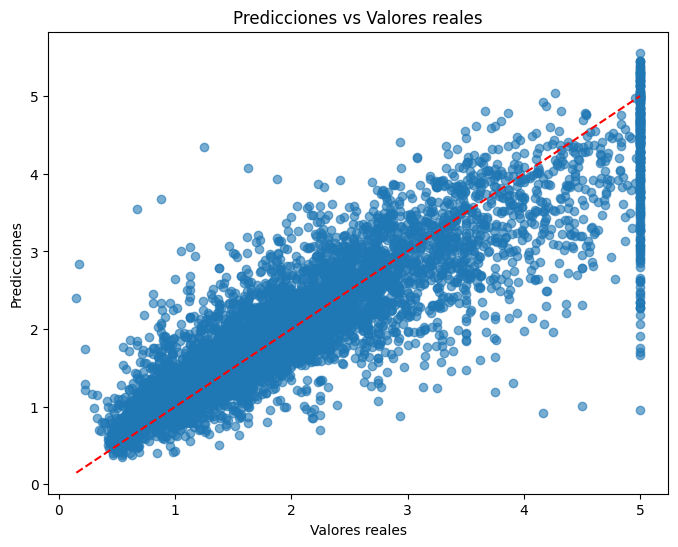

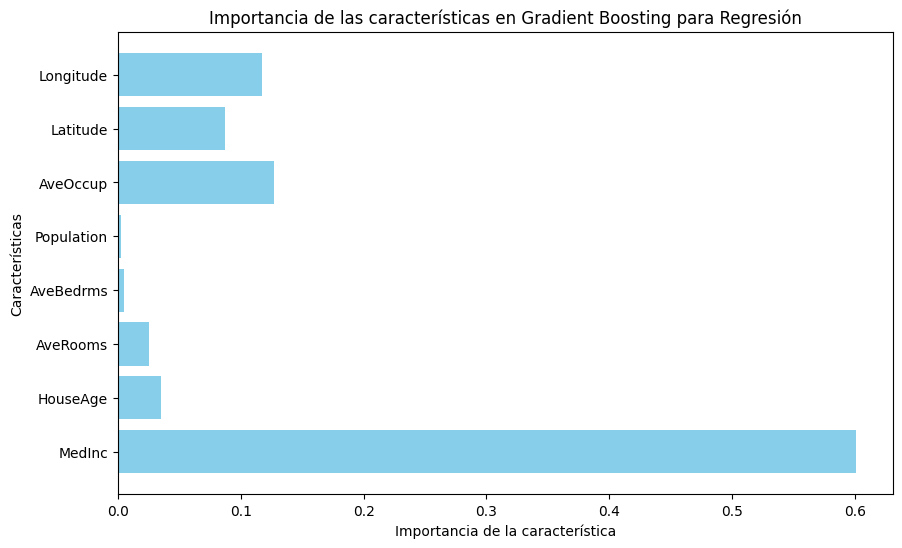

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos de California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir y entrenar el modelo Gradient Boosting para regresión
gbrt_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbrt_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred = gbrt_reg.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Función para graficar la relación entre las predicciones y los valores reales
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Predicciones vs Valores reales")
    plt.show()

# Graficar las predicciones frente a los valores reales
plot_predictions(y_test, y_pred)

# Importancia de características del modelo Gradient Boosting
importancias = gbrt_reg.feature_importances_
caracteristicas = feature_names

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en Gradient Boosting para Regresión")
plt.show()


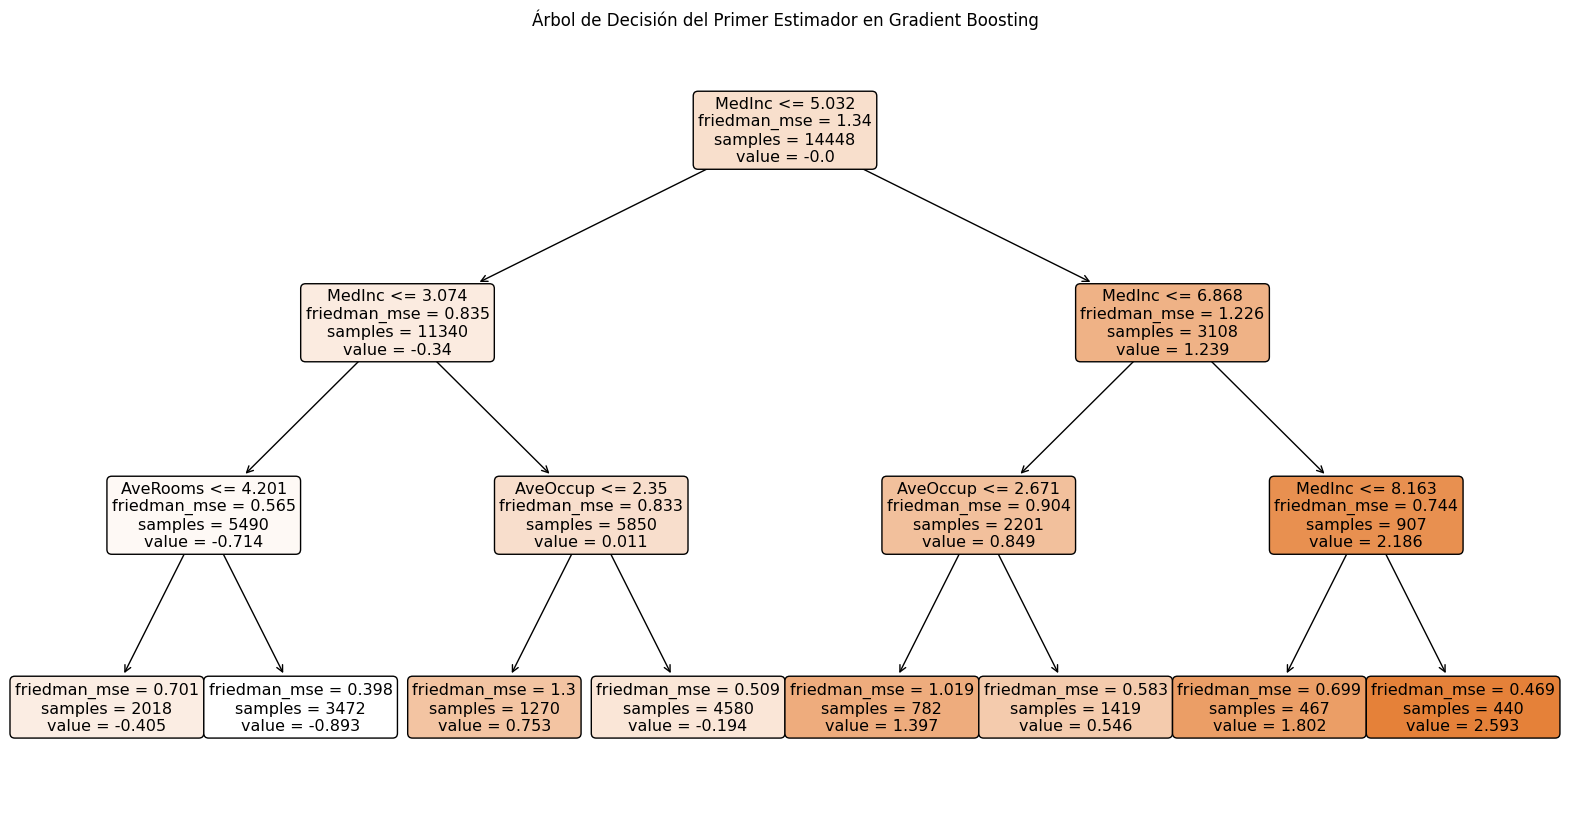

In [85]:
first_tree = gbrt_reg.estimators_[0, 0]

# Graficar el árbol de decisión del primer estimador del Gradient Boosting
plt.figure(figsize=(20, 10))
plot_tree(first_tree, filled=True, feature_names=feature_names, rounded=True)
plt.title("Árbol de Decisión del Primer Estimador en Gradient Boosting")
plt.show()

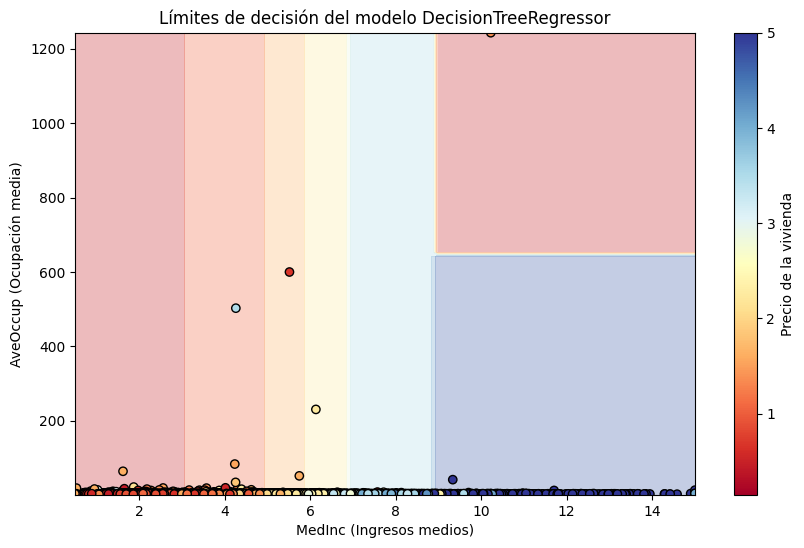

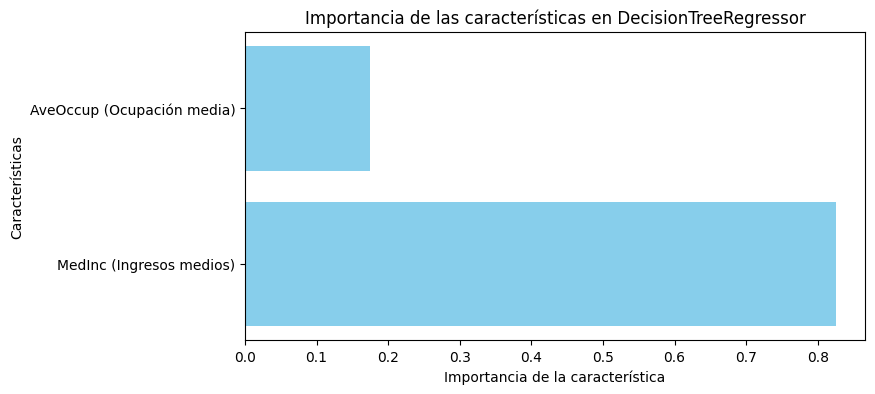

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos de California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

# Seleccionar dos características para la visualización
X = X[:, [0, 5]]  # Usar 'MedInc' y 'AveOccup' para simplificar la visualización

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir y entrenar el modelo DecisionTreeRegressor para visualización
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

# Crear una malla para visualizar los límites de decisión
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_reg.predict(X_new).reshape(x1.shape)

# Graficar los límites de decisión
plt.figure(figsize=(10, 6))
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel("MedInc (Ingresos medios)")
plt.ylabel("AveOccup (Ocupación media)")
plt.title("Límites de decisión del modelo DecisionTreeRegressor")
plt.colorbar(label='Precio de la vivienda')
plt.show()

# Importancia de características del modelo DecisionTreeRegressor
importancias = tree_reg.feature_importances_
caracteristicas = ["MedInc (Ingresos medios)", "AveOccup (Ocupación media)"]

# Graficar la importancia de las características
plt.figure(figsize=(8, 4))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en DecisionTreeRegressor")
plt.show()


In [87]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar los datos
X, y = load_iris(return_X_y=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los modelos base
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = SVC(probability=True, random_state=42)

# Crear el Voting Classifier con Soft Voting
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('rf', clf2),
    ('svc', clf3)],
    voting='soft')

# Entrenar el Voting Classifier
voting_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = voting_clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del Voting Classifier: {accuracy}")

# También se puede evaluar cada modelo base por separado
for clf, label in zip([clf1, clf2, clf3, voting_clf], ['Logistic Regression', 'Random Forest', 'SVM', 'Voting Classifier']):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Precisión de {label}: {accuracy_score(y_test, y_pred)}")


Precisión del Voting Classifier: 1.0
Precisión de Logistic Regression: 1.0
Precisión de Random Forest: 1.0
Precisión de SVM: 1.0
Precisión de Voting Classifier: 1.0


In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model selection: Decision Tree Classifier
base_model = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier with 10 base models
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Fit the bagging model to the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_model.predict(X_test)

# Calculate accuracy of the bagging model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Bagging Classifier: {:.2f}".format(accuracy))

Accuracy of Bagging Classifier: 0.96


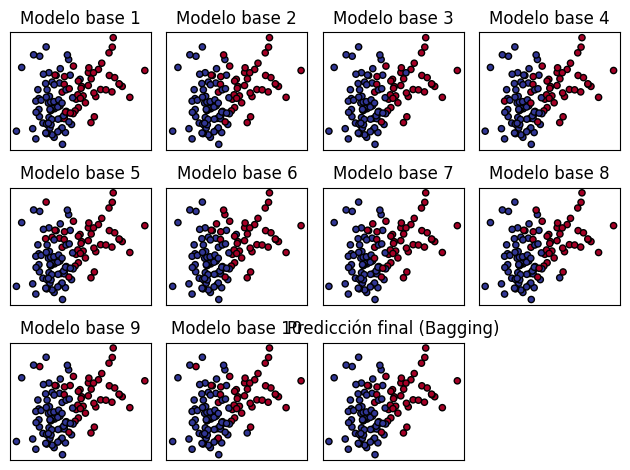

In [89]:
for i, estimator in enumerate(bagging_model.estimators_):
    y_pred_base = estimator.predict(X_test)
    plt.subplot(3, 4, i + 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_base, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
    plt.title(f'Modelo base {i+1}')
    plt.xticks(())
    plt.yticks(())

# Predicción final del modelo de Bagging
plt.subplot(3, 4, 11)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
plt.title('Predicción final (Bagging)')
plt.xticks(())
plt.yticks(())

plt.tight_layout()
plt.show()

Precisión del Pasting Classifier: 0.94


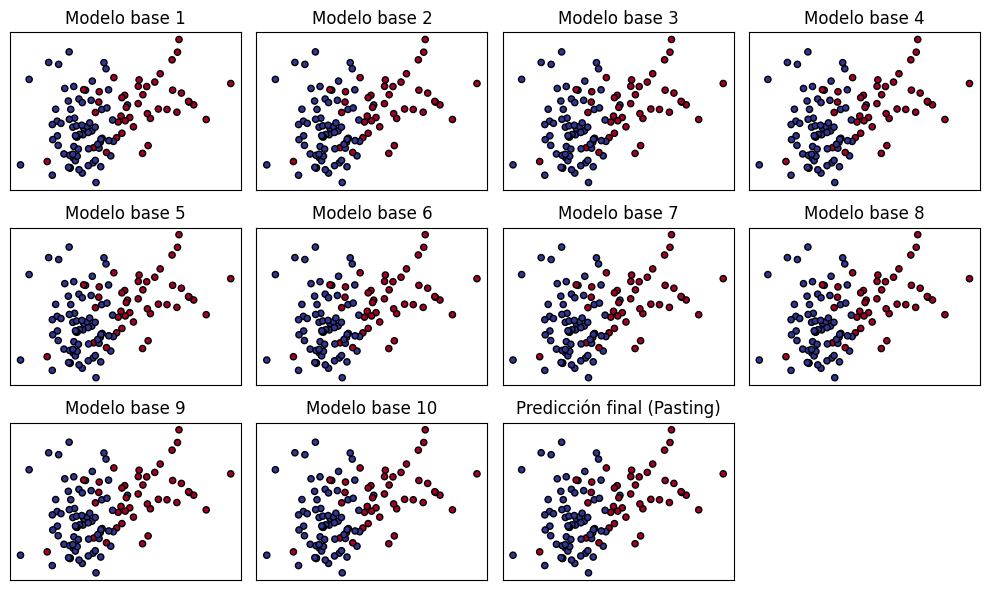

In [90]:
pasting_model = BaggingClassifier(base_model, n_estimators=10, bootstrap=False, random_state=42)

# Ajustar el modelo de pasting a los datos de entrenamiento
pasting_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = pasting_model.predict(X_test)

# Calcular la precisión del modelo de pasting
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del Pasting Classifier: {:.2f}".format(accuracy))

# Visualización de las predicciones de cada modelo base y la predicción final
plt.figure(figsize=(10, 6))

# Predicciones de cada modelo base
for i, estimator in enumerate(pasting_model.estimators_):
    y_pred_base = estimator.predict(X_test)
    plt.subplot(3, 4, i + 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_base, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
    plt.title(f'Modelo base {i+1}')
    plt.xticks(())
    plt.yticks(())

# Predicción final del modelo de Pasting
plt.subplot(3, 4, 11)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
plt.title('Predicción final (Pasting)')
plt.xticks(())
plt.yticks(())

plt.tight_layout()
plt.show()

Error cuadrático medio: 0.2939973248643864


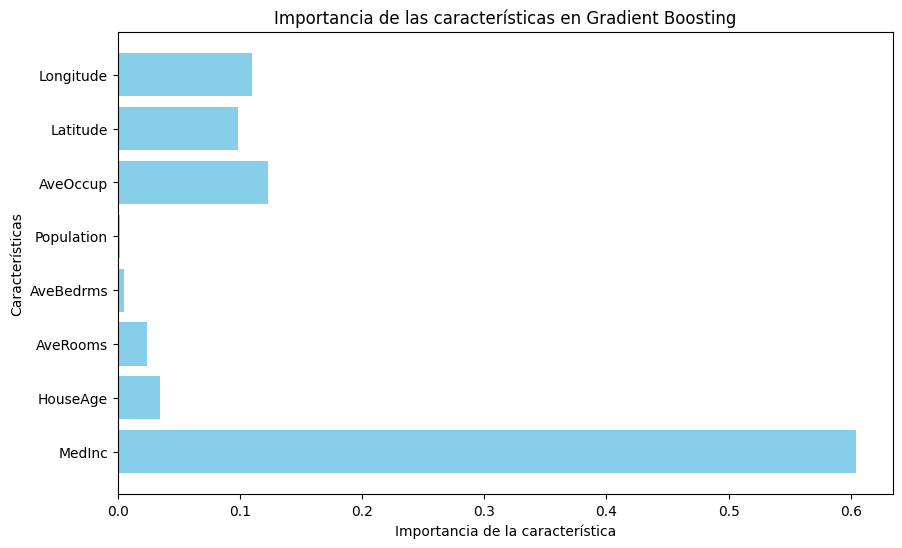

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos de California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir y entrenar el modelo Gradient Boosting para regresión
gbrt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbrt.fit(X_train, y_train)

# Realizar predicciones y calcular el error cuadrático medio
y_pred = gbrt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Graficar la importancia de las características
importancias = gbrt.feature_importances_
caracteristicas = housing.feature_names

plt.figure(figsize=(10, 6))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en Gradient Boosting")
plt.show()


In [93]:
data = {
    "Característica": [
        "Definición",
        "Funcionamiento",
        "Ventajas",
        "Desventajas",
        "Cuándo Usarlo",
        "Ejemplo de Implementación"
    ],
    "Random Forest": [
        "Ensamble de árboles de decisión entrenados en subconjuntos del dataset con reemplazo.",
        "- Cada árbol se entrena en un subconjunto diferente (bootstrap). \n- Predicciones mediante votación o promediado.",
        "- Alta robustez y precisión. \n- Reduce el overfitting. \n- Maneja datos faltantes y atípicos bien.",
        "- Menos interpretable que un solo árbol de decisión. \n- Puede ser computacionalmente costoso.",
        "- Problemas donde la precisión y la robustez son cruciales. \n- Datasets con valores atípicos y faltantes.",
        '''```python
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Cargar datos, entrenar y predecir
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
```'''
    ],
    "Gradient Boosting": [
        "Ensamble secuencial de modelos débiles (árboles de decisión) optimizando errores previos.",
        "- Modelos entrenados secuencialmente. \n- Minimiza una función de pérdida en cada iteración.",
        "- Alta precisión. \n- Flexibilidad para diferentes tipos de datos. \n- Captura relaciones complejas.",
        "- Susceptible al overfitting si no se ajusta adecuadamente. \n- Requiere ajuste de muchos hiperparámetros.",
        "- Problemas donde se necesita alta precisión. \n- Datasets con patrones complejos. \n- Capacidad computacional adecuada para ajustar hiperparámetros.",
        '''```python
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor

# Cargar datos, entrenar y predecir
gbrt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
```'''
    ],
    "Histogram-based Gradient Boosting": [
        "Variante de Gradient Boosting que utiliza histogramas para acelerar el entrenamiento.",
        "- Agrupa los datos en histogramas. \n- Reduce el costo computacional. \n- Optimiza los errores previos.",
        "- Más rápido que el Gradient Boosting tradicional. \n- Eficiente con grandes datasets. \n- Mantiene alta precisión.",
        "- Requiere buena estrategia de discretización. \n- Puede perder precisión si no se ajusta bien.",
        "- Grandes conjuntos de datos. \n- Situaciones donde la velocidad es más importante que una pequeña pérdida de precisión.",
        '''```python
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import HistGradientBoostingRegressor

# Cargar datos, entrenar y predecir
hist_gbrt = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)
hist_gbrt.fit(X_train, y_train)
y_pred = hist_gbrt.predict(X_test)
```'''
    ]
}

# Crear el DataFrame
df = pd.DataFrame(data)

In [94]:
df

,Característica,Random Forest,Gradient Boosting,Histogram-based Gradient Boosting
0,Definición,Ensamble de árboles de decisión entrenados en ...,Ensamble secuencial de modelos débiles (árbole...,Variante de Gradient Boosting que utiliza hist...
1,Funcionamiento,- Cada árbol se entrena en un subconjunto dife...,- Modelos entrenados secuencialmente. \n- Mini...,- Agrupa los datos en histogramas. \n- Reduce ...
2,Ventajas,- Alta robustez y precisión. \n- Reduce el ove...,- Alta precisión. \n- Flexibilidad para difere...,- Más rápido que el Gradient Boosting tradicio...
3,Desventajas,- Menos interpretable que un solo árbol de dec...,- Susceptible al overfitting si no se ajusta a...,- Requiere buena estrategia de discretización....
4,Cuándo Usarlo,- Problemas donde la precisión y la robustez s...,- Problemas donde se necesita alta precisión. ...,- Grandes conjuntos de datos. \n- Situaciones ...
5,Ejemplo de Implementación,```python\nimport numpy as np\nfrom sklearn.da...,```python\nimport numpy as np\nfrom sklearn.da...,```python\nimport numpy as np\nfrom sklearn.da...


In [95]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1bIpsAC5bglqABNwecqkv9HI6EwuIMLEN2V_EwS9mXtA#gid=0


Error cuadrático medio (Gradient Boosting): 0.2939973248643864


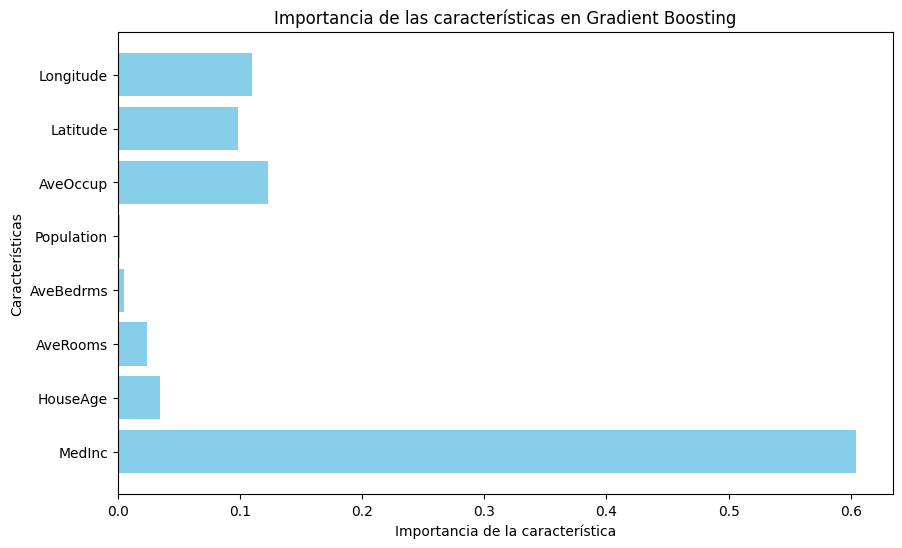

Error cuadrático medio (Histogram-based Gradient Boosting): 0.29134891854053446


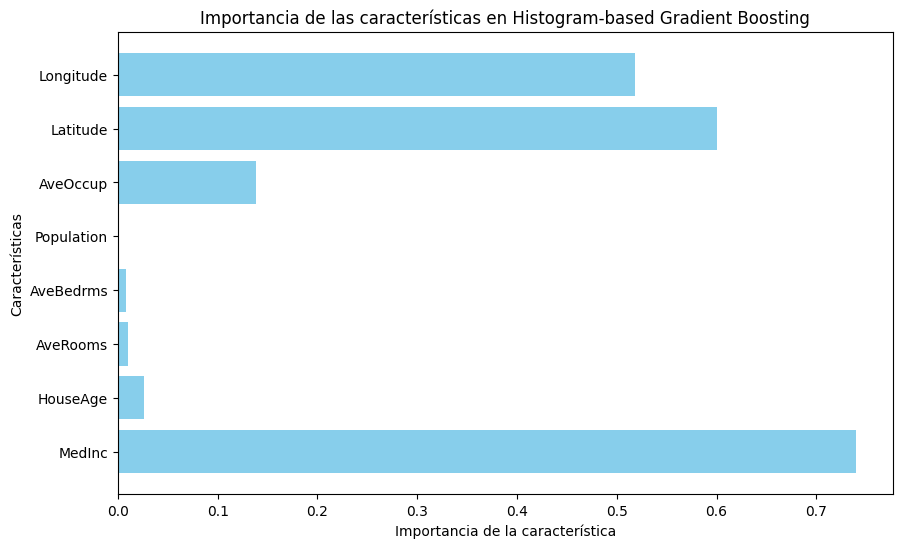

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Cargar los datos de California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir y entrenar el modelo Gradient Boosting para regresión
gbrt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbrt.fit(X_train, y_train)

# Realizar predicciones y calcular el error cuadrático medio
y_pred = gbrt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (Gradient Boosting): {mse}")

# Graficar la importancia de las características
importancias = gbrt.feature_importances_
caracteristicas = housing.feature_names

plt.figure(figsize=(10, 6))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en Gradient Boosting")
plt.show()

# Definir y entrenar el modelo Histogram-based Gradient Boosting para regresión
hist_gbrt = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)
hist_gbrt.fit(X_train, y_train)

# Realizar predicciones y calcular el error cuadrático medio
y_pred_hist = hist_gbrt.predict(X_test)
mse_hist = mean_squared_error(y_test, y_pred_hist)
print(f"Error cuadrático medio (Histogram-based Gradient Boosting): {mse_hist}")

# Calcular la importancia de características usando permutation importance
result = permutation_importance(hist_gbrt, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Graficar la importancia de las características
importancias_hist = result.importances_mean

plt.figure(figsize=(10, 6))
plt.barh(caracteristicas, importancias_hist, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de las características en Histogram-based Gradient Boosting")
plt.show()


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:15:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.7}
Precisión del modelo XGBoost optimizado: 0.9649122807017544


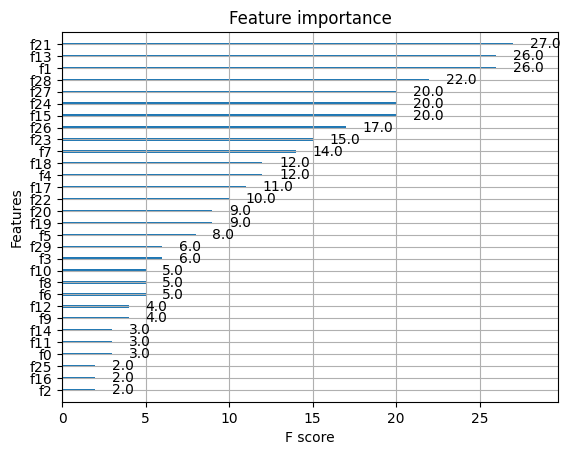

In [97]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Cargar los datos de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Definir los hiperparámetros para Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Entrenar el modelo con Grid Search
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Mejores parámetros: {best_params}")

# Realizar predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo XGBoost optimizado: {accuracy}")

# Gráfica de importancia de características
xgb.plot_importance(best_model)
plt.show()
